# Resumo
Este projeto irá explorar brevemente os dados de um Hospital com possíveis pacientes diabéticos, assim sendo necessário criar modelos preditivos para auxiliar no diagnóstico dos futuros pacientes baseado no histórico dos pacientes já registrados 

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv("diabetes.csv").iloc[:,1:]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


## Traduzindo colunas

In [31]:
df.columns = ['Gestacao', 'Glicose', 'Pressao arterial',
       'Expessura da pele', 'Insulina', 'IMC', 'Idade', 'Tem diabetes?']

In [32]:
df.head()

,Gestacao,Glicose,Pressao arterial,Expessura da pele,Insulina,IMC,Idade,Tem diabetes?
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


## Informações adicionais

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gestacao           768 non-null    int64  
 1   Glicose            768 non-null    int64  
 2   Pressao arterial   768 non-null    int64  
 3   Expessura da pele  768 non-null    int64  
 4   Insulina           768 non-null    int64  
 5   IMC                768 non-null    float64
 6   Idade              768 non-null    int64  
 7   Tem diabetes?      768 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 48.1 KB


## Verificando dados nulos

In [34]:
df.isnull().sum()

Gestacao             0
Glicose              0
Pressao arterial     0
Expessura da pele    0
Insulina             0
IMC                  0
Idade                0
Tem diabetes?        0
dtype: int64

***

## Distruibuição das idades dos diagnosticados

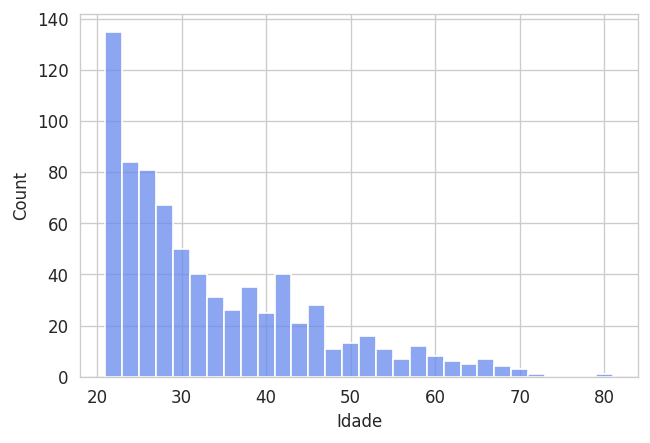

In [35]:
sns.set_style("whitegrid")
plt.figure(dpi=120)
sns.set_palette("coolwarm")
sns.histplot(data=df, x='Idade', bins=30)
plt.show()

Obs: Notamos que a maioria dos pacientes tem entre 20 e 30 anos


## Distribuição de pessoas com e sem diabetes

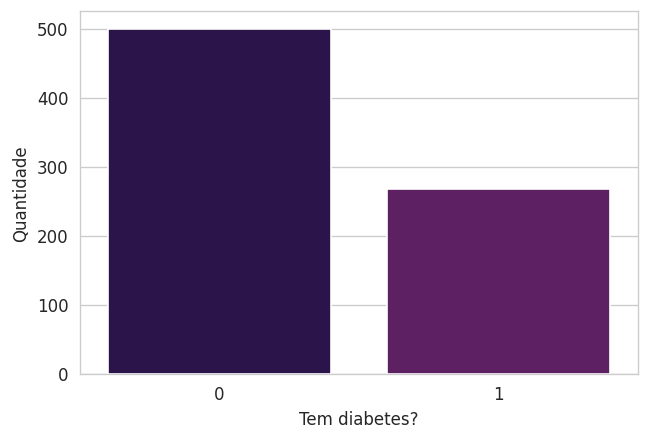

In [36]:
plt.figure(dpi=120)
sns.set_palette("inferno")
sns.countplot(x='Tem diabetes?', data=df)
plt.ylabel("Quantidade")
plt.show()

## Visualizando distribuição de diagnosticados baseados em seu IMC e em sua glicose

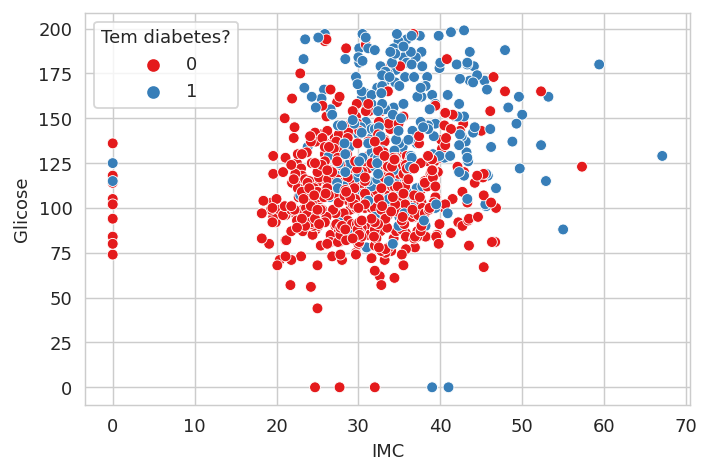

In [37]:
plt.figure(dpi=130)
sns.set_palette("Set1")
sns.scatterplot(y='Glicose', x='IMC', hue='Tem diabetes?', data=df)
plt.show()

Obs: É evidente que a maioria dos pacientes estão acima do peso, e os diagnosticados com diabetes são os que mais tem o percentual de glicose alto
***

## Distribuição da pressão arterial dos pacientes baseados em sua idade

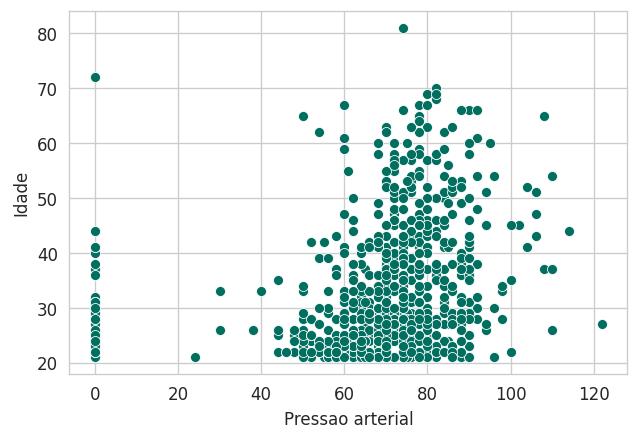

In [38]:
plt.figure(dpi=120)
sns.set_palette("PuBuGn_r")
sns.scatterplot(y='Idade', x='Pressao arterial', data=df)
plt.show()

Obs: Vemos que a pressão arterial da maioria dos pacientes é alta independente da idade.

***
## Agrupando média de glicose de quem tem e de quem nao tem diabetes

In [39]:
df[["Glicose","Tem diabetes?"]].groupby("Tem diabetes?").mean().sort_values(by="Glicose", ascending=False)

,Glicose
Tem diabetes?,
1,141.257463
0,109.980000


## média de glicose de quem tem e de quem nao tem diabetes

In [40]:
df[["Insulina","Tem diabetes?"]].groupby("Tem diabetes?").mean().sort_values(by="Insulina", ascending=False)

,Insulina
Tem diabetes?,
1,100.335821
0,68.792000


## Média de idade das pessoas diagnosticadas

In [41]:
df[["Idade","Tem diabetes?"]].groupby("Tem diabetes?").mean().sort_values(by="Idade", ascending=False)

,Idade
Tem diabetes?,
1,37.067164
0,31.190000


## Expessura da pele dos diagnosticados

In [42]:
df[["Expessura da pele","Tem diabetes?"]].groupby("Tem diabetes?").mean().sort_values(by="Expessura da pele", ascending=False)

,Expessura da pele
Tem diabetes?,
1,22.164179
0,19.664000


## Pressão arterial dos diagnosticados

In [43]:
df[["Pressao arterial","Tem diabetes?"]].groupby("Tem diabetes?").mean().sort_values(by="Pressao arterial", ascending=False)

,Pressao arterial
Tem diabetes?,
1,70.824627
0,68.184000


## Índice de massa corporal(IMC) dos diagnosticados

In [44]:
df[["IMC","Tem diabetes?"]].groupby("Tem diabetes?").mean().sort_values(by="IMC", ascending=False)

,IMC
Tem diabetes?,
1,35.142537
0,30.304200


## Visualizando correlações entre as variáveis

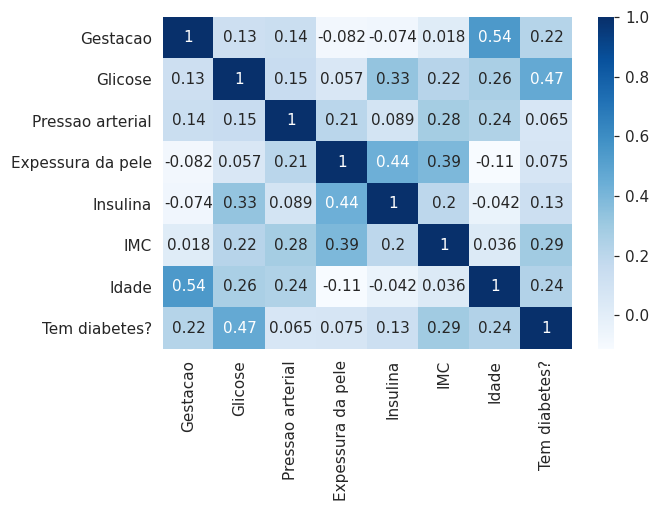

In [45]:
plt.figure(dpi=110)
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

***
# Preparando dados para início dos modelos
Modelos escolhidos: Adaboost, GradientBoosting, Random Forest, SVC e Logistic Regression

In [46]:
X = df.drop("Tem diabetes?", axis=1)
y = df['Tem diabetes?']

In [47]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Instanciando modelos

In [48]:
adamodel = AdaBoostClassifier()
gradmodel = GradientBoostingClassifier()
logmodel = LogisticRegression()
rfmodel = RandomForestClassifier()
svcmodel = SVC()
extmodel = ExtraTreesClassifier()

## Treinando Modelos

In [49]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=46)

In [50]:
adamodel.fit(Xtrain, ytrain)
gradmodel.fit(Xtrain, ytrain)
logmodel.fit(Xtrain, ytrain)
rfmodel.fit(Xtrain, ytrain)
svcmodel.fit(Xtrain, ytrain)
extmodel.fit(Xtrain, ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

## Armazenando predições

In [51]:
adapred = adamodel.predict(Xtest)
gradpred = gradmodel.predict(Xtest)
logpred = logmodel.predict(Xtest)
rfpred = rfmodel.predict(Xtest)
svcpred = svcmodel.predict(Xtest)
extpred = extmodel.predict(Xtest)

## Armazenando e averiguando Score

In [52]:
adascore = adamodel.score(Xtest, ytest)*100
gradscore = gradmodel.score(Xtest, ytest)*100
logscore = logmodel.score(Xtest, ytest)*100
rfscore = rfmodel.score(Xtest, ytest)*100
svcscore = svcmodel.score(Xtest, ytest)*100
extscore = extmodel.score(Xtest, ytest)*100

In [53]:
scores = {
            "Adaboost":adascore,
            "Gradient Boosting":gradscore,
            "Logistic Regression":logscore,
            "Random Forest":rfscore,
            "SVC":svcscore,
            "Extra Tree":extscore
        }
scores = pd.DataFrame({"Modelo":list(scores.keys()),"Score":list(scores.values())}).sort_values(by="Score",ascending=False)
scores

,Modelo,Score
4,SVC,77.922078
2,Logistic Regression,77.056277
1,Gradient Boosting,74.458874
5,Extra Tree,74.025974
3,Random Forest,73.593074
0,Adaboost,70.129870


Obs: Aparentemente a primeira vista o modelo SVC obteve melhor desempenho

## Armazenando métricas gerais

In [54]:
perfada = classification_report(ytest, adapred)
perfgrad = classification_report(ytest, gradpred)
perflog = classification_report(ytest, logpred)
perfrf = classification_report(ytest, rfpred)
perfsvc = classification_report(ytest, svcpred)
perfext = classification_report(ytest, extpred)

## Visualizando Margem de erros

Text(0.5, 0, 'Margem de erro')

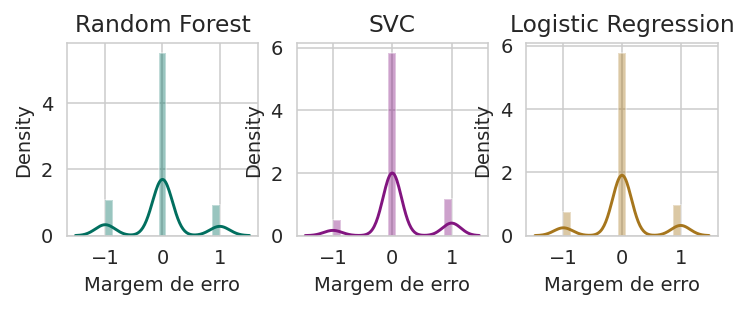

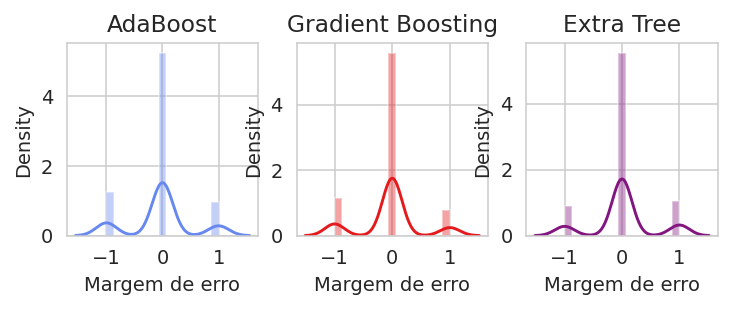

In [55]:
plt.figure(dpi=140)
plt.subplot(2,3,1)
sns.set_palette("BuPu_r")
plt.title("Random Forest")
sns.distplot(ytest - rfpred)
plt.xlabel("Margem de erro")
#
plt.subplot(2,3,2)
sns.set_palette("Dark2_r")
plt.title("SVC")
sns.distplot(ytest - svcpred)
plt.xlabel("Margem de erro")
#
plt.subplot(2,3,3)
sns.set_palette("coolwarm")
plt.title("Logistic Regression")
sns.distplot(ytest - logpred)
plt.xlabel("Margem de erro")
#
plt.figure(dpi=140)
plt.subplot(2,3,4)
sns.set_palette("Set1")
plt.title("AdaBoost")
sns.distplot(ytest - adapred)
plt.xlabel("Margem de erro")
#
plt.subplot(2,3,5)
sns.set_palette("BuPu_r")
plt.title("Gradient Boosting")
sns.distplot(ytest - gradpred)
plt.xlabel("Margem de erro")
#
plt.subplot(2,3,6)
sns.set_palette("BuPu_r")
plt.title("Extra Tree")
sns.distplot(ytest - extpred)
plt.xlabel("Margem de erro")

## Métricas gerais da performance dos modelos para ver realmente quem performou melhor

In [56]:
print(f"--------------- AdaBoost -------------------{perfada}\n\n\n--------------- Logistic Regression -------------------{perflog}\n\n\n--------------- Gradient Boosting -------------------{perfgrad}\n\n\n--------------- Random Forest -------------------{perfrf}\n\n\n--------------- SVC -------------------{perfsvc}\n\n\n--------------- Extra Tree -------------------{perfext}")

--------------- AdaBoost -------------------              precision    recall  f1-score   support

           0       0.79      0.74      0.76       151
           1       0.56      0.62      0.59        80

    accuracy                           0.70       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.70      0.70       231



--------------- Logistic Regression -------------------              precision    recall  f1-score   support

           0       0.81      0.85      0.83       151
           1       0.68      0.62      0.65        80

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



--------------- Gradient Boosting -------------------              precision    recall  f1-score   support

           0       0.83      0.77      0.80       151
           1       0.62      0.70      0.65        80

    accuracy              

# Conclusão
Apesar do modelo SVC ter apresentado um melhor score, o modelo de Regressão Logistica obteve um melhor desempenho em relação aos outros baseado nas métricas gerais